# Data Exploration

By Patricia


# Set up notebook

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_dir = r'../datar/'
os.listdir(data_dir)

['gender_submission.csv', 'test.csv', 'train.csv']

# Import training data

In [4]:
train_df = pd.read_csv(os.path.join(data_dir,'train.csv'))

In [6]:
train_df.shape

(891, 12)

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Initial look

Following this tutorial: https://www.districtdatalabs.com/how-to-start-your-first-data-science-project

Starting with questions:  
1. What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?  
2. Are the numerical variables correlated?  
3. Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?  
4. Are there different survival rates in different categories? For example, did more women survived than man?

There aren't very many variables, so I'll look at all of them. 

## 1. What do the variables look like?

Details for the data are here: 

In [16]:
train_df.describe() # Default is numerical columns only

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train_df.describe(include=['O']) # Look at strings

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Yrois, Miss. Henriette (""Mrs Harbeck"")",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


A few observations:

* Data is missing for *Age*. (Only 714 entries out of 891)  
* All other numerical columns have data for every passenger  
* Cabins, embarked are incomplete

Look at the distributions for each variable. 

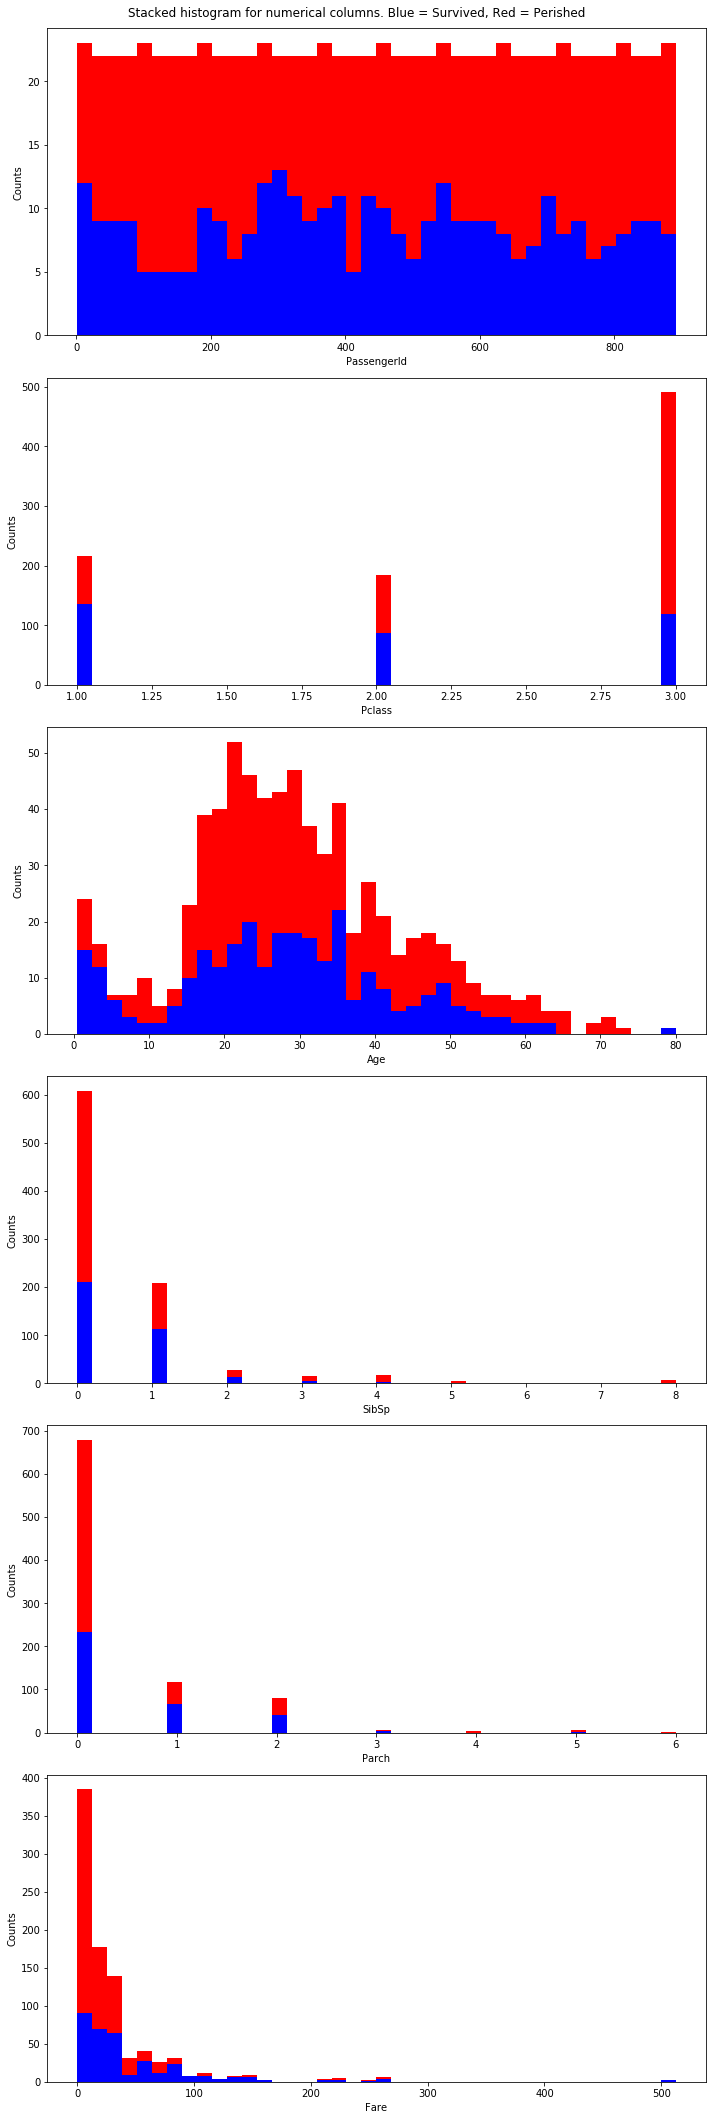

In [83]:
num_vars = ['PassengerId','Pclass','Age','SibSp','Parch','Fare']
fig, axes = plt.subplots(nrows = len(num_vars), sharex = False, figsize=(10,30))

mask_survived = train_df['Survived'] == True

train_df.loc[~mask_survived,'Age']

for idx, ax in enumerate(axes):
    var = num_vars[idx]
    ax.hist([train_df.loc[mask_survived,var],train_df.loc[~mask_survived,var]],stacked=True,
            color=['blue','red'],bins=40)
    ax.set_xlabel(var)
    ax.set_ylabel('Counts')
fig.suptitle('Stacked histogram for numerical columns. Blue = Survived, Red = Perished');
fig.tight_layout()
fig.subplots_adjust(top=0.97)